In [1]:
import pandas as pd
from utils.preprocessor import preprocessor
from models.skmodels import model
from utils.load_dataframes import load_dataframes

df = pd.read_csv('data/data.csv')


In [19]:
#ends_without_TR = (lambda x: "TR"!=x.split(" ")[-1])
#s = df['mos'].apply(ends_without_TR)
#df['resolved'] 
df['resolved']

0          0
1          0
2          0
3          0
4          0
          ..
1798793    0
1798794    0
1798795    0
1798796    0
1798797    0
Name: resolved, Length: 1798798, dtype: int64

In [15]:
#df["mos"] = df["mos"].apply(ends_without_TR)
display(df['mos'])

0          False
1          False
2          False
3           True
4          False
           ...  
1798793     True
1798794     True
1798795    False
1798796    False
1798797    False
Name: mos, Length: 1798798, dtype: bool

In [10]:
df[['resolved','mos']]

,resolved,mos
0,1,IA PP TR
1,0,IA BA TS nl TR
2,1,IA AA BA MR nl PT TR
3,1,IA BA
4,0,IA BA TS nl mm TR
...,...,...
1798793,1,IA BA TA nl
1798794,1,IA BA
1798795,1,IA PP TR
1798796,0,IA IA TR


In [22]:
time_columns = ["time_stamp",
                             "account_open_date_13_march","account_open_date_18_march"]
df[time_columns]

,account_open_date_13_march,account_open_date_18_march
0,5/19/2013,5/19/2013
1,9/22/2003,9/22/2003
2,9/4/2017,9/4/2017
3,2/7/2024,2/7/2024
4,1/2/2022,1/2/2022
...,...,...
1798793,2/8/2022,2/8/2022
1798794,2/8/2022,2/8/2022
1798795,8/24/2023,8/24/2023
1798796,5/15/2019,5/15/2019


In [45]:
from sklearn.preprocessing import MultiLabelBinarizer
s = df["mos"].apply(lambda x: x.split(" "))
mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_)

In [61]:
from sklearn.preprocessing import LabelEncoder
account_status_encoder = LabelEncoder()
account_status_encoder.fit(pd.concat([df["account_status_13_march"],df["account_status_18_march"]]))

LabelEncoder()

In [72]:
df = pd.read_csv('data/data.csv',nrows=1000)
pp = preprocessor()
df = pp.process(df)

start processing, (1000, 24)
removing rare reasons, shape : (1000, 27)
removed rare reasons, new shape : (948, 27)


c:\Users\bingy\Documents\GitHub\IllinoisDatathon2024\utils\preprocessor.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  print(f"    shape after processing mos : {df.shape}")


KeyError: 'time_stamp'

In [71]:
df['ebill_enrolled_status_13_march'].unique()

array(['E', ' ', 'L', 'D', 'B', nan], dtype=object)

In [57]:
categorical_columns = ["retailer_code",
                                    "reason",
                                    "mos",
                                    "ebill_enrolled_status_13_march","ebill_enrolled_status_18_march",
                                    "account_status_13_march","account_status_18_march",
                                    "card_activation_status_13_march","card_activation_status_18_march",]

print((df['ebill_enrolled_status_13_march']!=df['ebill_enrolled_status_18_march']).sum(),
(df['account_status_13_march']!=df['account_status_18_march']).sum(),
(df['card_activation_status_13_march']!=df['card_activation_status_18_march']).sum())


21354 34302 35530


In [36]:
pd.to_datetime("240315124742", format='%y%m%d%H%M%S').day

15

In [35]:
td = pd.to_datetime("9/13/2024", format='%m/%d/%Y') - pd.to_datetime("240315124742", format='%y%m%d%H%M%S')
type(td.days)

int

In [34]:
from sklearn.metrics import confusion_matrix
s1 = df['mos'].apply(lambda x: 1 if x.split(' ')[-1]=='TR' else 0)
s2 = df['resolved'].apply(lambda x: 1 if x=='floor' else 0)
(s1!=s2).sum()
cm = confusion_matrix(s2, s1)
print(cm)

[[579107 853474]
 [ 16140 350077]]


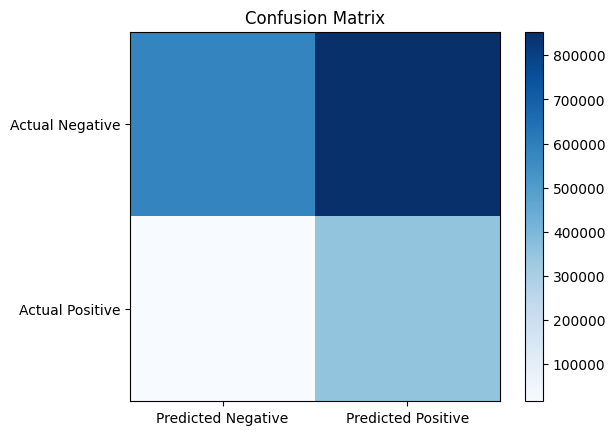

In [35]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add legends
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

plt.show()


In [13]:
def test(X, y, sample = 1000):
    X['reason']=y
    df = X.sample(sample)
    X,y = df.drop(columns = ['reason']), df['reason']

    models = model()
    models.cross_validate("DecisionTree", X, y)


In [31]:

models = model()
modelnames = ["RandomForest",
              "XGBoost",
              "GradientBoosting",
              "AdaBoost",
              "DecisionTree"
              ]

for name in modelnames: 
    print(f"Training model : {name}")
    models.cross_validate(name,X, y)

Training model : LinearRegression
Model score on test data (fold 0): 0.0189
Model score on test data (fold 1): 0.0182
Model score on test data (fold 2): 0.0064
Model score on test data (fold 3): -0.1583
Model score on test data (fold 4): -0.0613
Average ACC: -0.0352 pm 0.0683
Training model : Ridge
Model score on test data (fold 0): 0.0194
Model score on test data (fold 1): 0.0182
Model score on test data (fold 2): 0.0179
Model score on test data (fold 3): -0.0341
Model score on test data (fold 4): -0.0339
Average ACC: -0.0025 pm 0.0257
Training model : Lasso
Model score on test data (fold 0): -0.0080
Model score on test data (fold 1): -0.0081
Model score on test data (fold 2): 0.0111
Model score on test data (fold 3): -0.0238
Model score on test data (fold 4): -0.0410
Average ACC: -0.0140 pm 0.0175
Training model : RandomForest
Model score on test data (fold 0): 0.1400
Model score on test data (fold 1): 0.2659
Model score on test data (fold 2): 0.0612
Model score on test data (fold 3)

In [38]:
df['account_open_date_13_march']==df['account_open_date_18_march'].sum()

In [36]:
display(df)

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,0,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,0,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0,12.0,0.00,[00],9/4/2017,NaN,8,0,,0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894160,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0
894161,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0
894162,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,0,7.0,35.66,[00],8/24/2023,NaN,0,0,,0
894163,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,0,8.0,386.63,[00],5/15/2019,A,0,1,L,0


In [9]:
y

0         33
1          4
2         35
3          4
4          4
          ..
894160     4
894161     4
894162    33
894163    15
894164    24
Name: reason, Length: 1798798, dtype: int32